<a href="https://colab.research.google.com/github/DommiiUdomp/-/blob/main/ValidationSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation Set

In [2]:
import tensorflow as tf

In [7]:
from sklearn.datasets import load_diabetes

In [9]:
diabetes_dataset = load_diabetes()
print (diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [11]:
#save the input and target variables

print (diabetes_dataset.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [13]:
data = diabetes_dataset['data']
target = diabetes_dataset['target'] #number from 0 to 300

In [15]:
#normalize the target data

target_normalize = (target - target.mean(axis=0)) / target.std() #target subtrack with mean then deivid by standard deviation 

In [16]:
#split the data into test and train

from sklearn.model_selection import train_test_split

In [18]:
train_data, test_data ,train_target, test_target = train_test_split (data, target_normalize, test_size = 0.1) #train_size = 90% and test size=10%

print (train_data.shape)
print (test_data.shape)
print (train_target.shape)
print (test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [19]:
#Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
#six dense layers , output target one neural = one single number 
def get_model() :
  model = Sequential ( [
                        Dense (128, activation = 'relu' , input_shape = (train_data.shape[1], )) ,
                        Dense (128, activation = 'relu' ) ,
                        Dense (128, activation = 'relu' ) ,
                        Dense (128, activation = 'relu' ) ,
                        Dense (128, activation = 'relu' ) ,
                        Dense (128, activation = 'relu' ) ,
                        Dense (1, name = 'output') ,
  ])
  return model

model = get_model()

In [20]:
input_shape = (train_data.shape[1], )
input_shape

(10,)

In [22]:
#print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 1

In [23]:
#compile

model.compile ( optimizer = 'adam' , loss = 'mse' , metrics=['mae'])

##train the model

history = model.fit(train_data, train_target, epochs = 100 , validation_split=0.15 , batch_size=64, verbose=False)

In [24]:
#Evaluate

model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.9696 - mae: 0.7571


[0.9695625901222229, 0.7571325302124023]

In [25]:
#plot 

import matplotlib.pyplot as plt

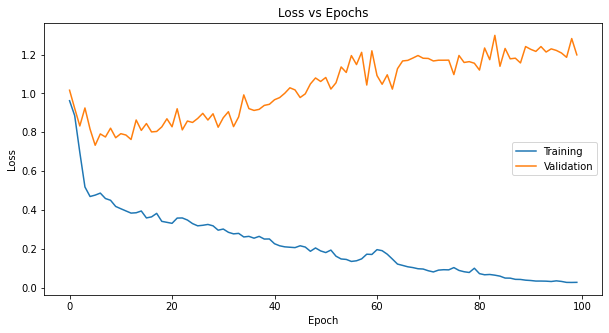

In [46]:
plt.figure(figsize=(10,5))

plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Validation'], loc ='center right')
plt.show()


In [41]:
#try to reduce validation set #train the model

history1 = model.fit(train_data, train_target, epochs = 100 , validation_split=0.25 , batch_size=64, verbose=False)

#Evaluate
model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.9464 - mae: 0.7329


[0.9463818073272705, 0.7328521013259888]

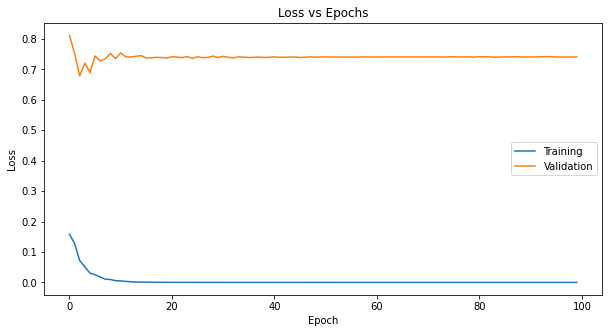

In [47]:
plt.figure(figsize=(10,5))

plt.plot (history1.history['loss'])
plt.plot (history1.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Validation'], loc ='center right')
plt.show()

2/2 - 0s - loss: 0.9307 - mae: 0.7276


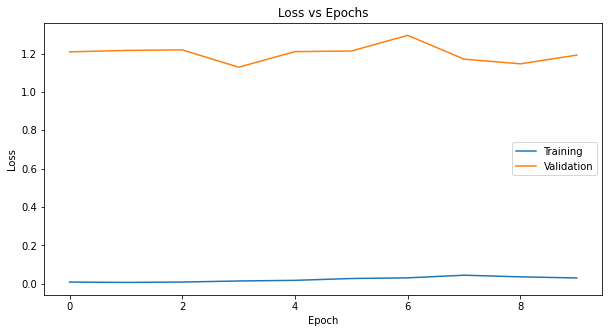

In [48]:
#try to reduce epochs #train the model

history2 = model.fit(train_data, train_target, epochs = 10 , validation_split=0.15 , batch_size=64, verbose=False)

#Evaluate
model.evaluate(test_data, test_target, verbose=2)

#plot
plt.figure(figsize=(10,5))

plt.plot (history2.history['loss'])
plt.plot (history2.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Validation'], loc ='center right')
plt.show()